<a href="https://colab.research.google.com/github/shihab-iiuc/Linear-Regression-learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


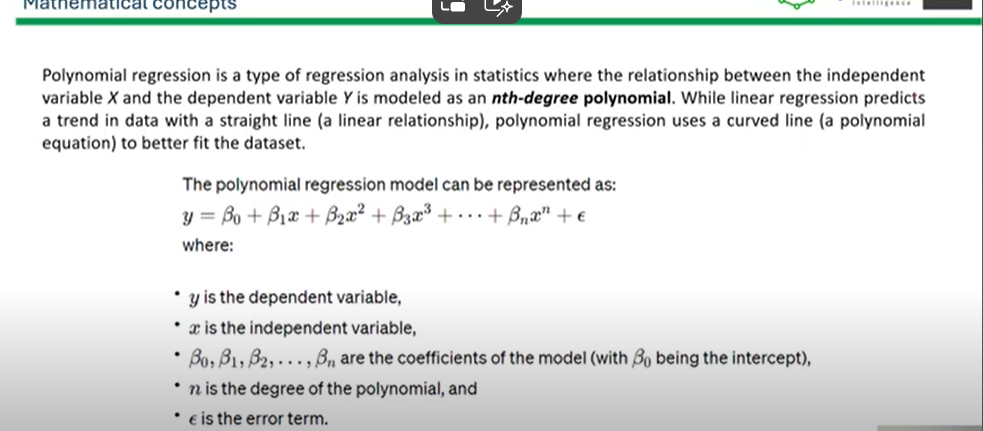

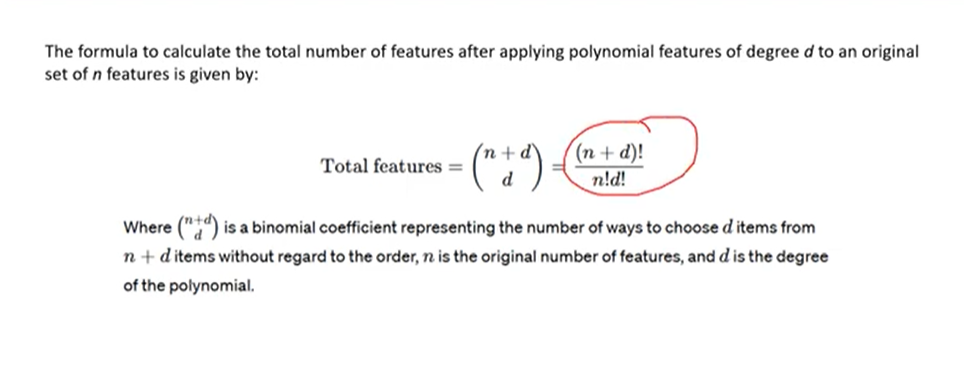

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk


df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nonlinear_data.csv')

df




,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553
...,...,...
495,9.91984,-0.959196
496,9.93988,-0.912081
497,9.95992,-1.026475
498,9.97996,-1.019379


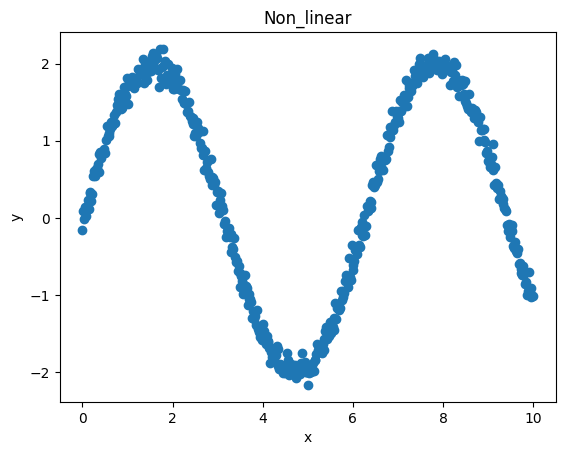

In [3]:
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non_linear')
plt.show()

In [4]:
df.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


# if we apply linear regression to polynomial regression

In [6]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(df[['x']],df['y'])

model.score(df[['x']],df[['y']])


0.004321199719043656

Now Apply polynomial regression

In [11]:
from  sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(df[['x']])
x_poly.shape

(500, 6)

In [12]:
polymodel=LinearRegression()
polymodel.fit(x_poly,df['y'])
polymodel.score(x_poly,df['y'])


0.9301853282900979

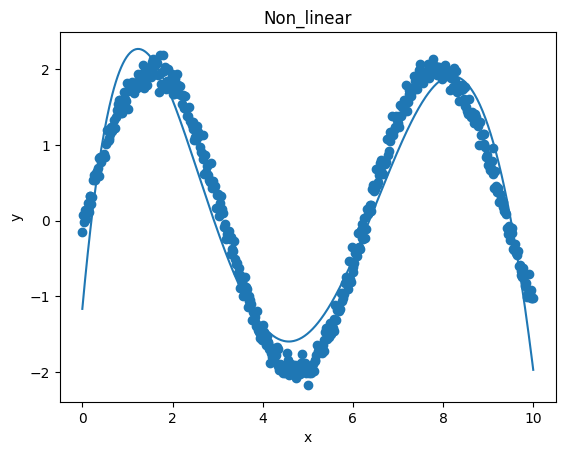

In [13]:
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non_linear')
plt.plot(df['x'],polymodel.predict(x_poly))
plt.show()

In [15]:
x_poly_train,x_poly_test,y_train,y_test=sk.model_selection.train_test_split(x_poly,df['y'],test_size=0.3,random_state=42)
reg=LinearRegression()
reg.fit(x_poly_train,y_train)
reg.score(x_poly_test,y_test)

0.928351589043782

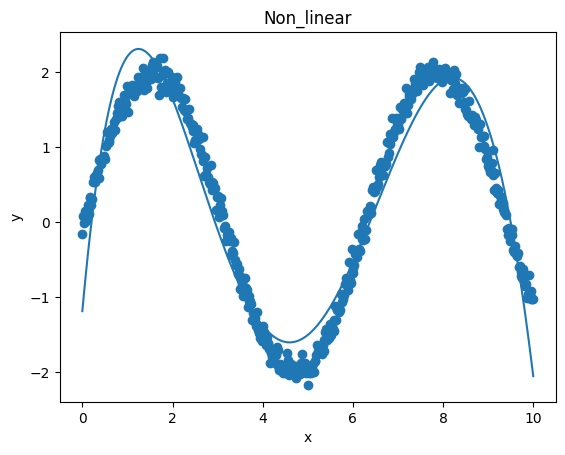

In [16]:
plt.scatter(df['x'],df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non_linear')
plt.plot(df['x'],reg.predict(x_poly))
plt.show()
